# Employee Group Project 23

##### By Tracy Gan, Aronn Laurel, Nikita Prabhu, Nolan Vu


### Data Description

We will work on the [Employee Dataset on Kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset) which contains information about the employees in the company, including their personal information such as age, gender, educational background, years of experience, salary tier, and the city where they work. The dataset also contains their information in regards to the company, such as the year they joined, and if they were ever benched. Specifically, each variable is broken down into

| Variable Name     | Type of Variable | Description |
|-------------------|------------------|-------------|
| Education         | Categorical  | It represents the educational qualities of employees. There are three unique levels for this categorical variable, which are Bachelors, Masters, and PHD.   |
| JoiningYear       | Categorical  | It represents the year each employee joined the company, which also indicates the length of their service to the company.  |
| City              | Categorical  | It represents the city where the employee works at. There are three unique values for this categorical variable, which are Bangalore, Pune, New Delhi.      |
| PaymentTier         | Categorical  | Categorization of employees into various salary levels (1-3)   |
| Age       | Continuous  | Employee Age  |
| Gender              | Categorical  | Employee Gender (Male/Female)  |
| EverBenched         | Categorical  | Whether an employee has ever been temporarily unassigned to work (Yes/No) |
| ExperienceInCurrentDomain       |  Continuous | Number of years of experience employees have in their current field |
| LeaveOrNot              | Categorical  | Our project's Target column, whether an employee will leave the company or not (0:Leave 1:Stay)     |

In total, there are 9 variables and 4653 rows of observation for each column with no missing values for any of the variables. This Employee dataset, found on Kaggle, came from the contributions of a HR department of a company, of which is anonymized as well as the people who contribute to this dataset. 

### Question

With this dataset, we are interested in mainly two questions. 
1. Can age, the year they joined and their payment tier be used to predict whether an employee would leave the company?
2. Does education, gender and experience in the current domain affect the payment tier?

### Aronn's Question (Planning Stage)
> How does educational qualifications, payment tier, age, and work experience affect the likelihood of an employee taking leave, and can these factors reliably predict whether an employee will take leave?
> 
My question covers both prediction and inference questions about the dataset which I will conduct some exploratory data analysis and visualisation to answer the question.

In [60]:
install.packages("corrplot")
install.packages("cowplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [61]:
# Firstly, we will load some libraries so that we can perform data analysis and visualisation to answer our question.

# Loading Libraries
#library(tidymodels)
library(tidyverse)
library(dplyr)
library(forcats)
library(ggplot2)
library(corrplot)
library(cowplot)

corrplot 0.95 loaded


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [98]:
employee_data <- read_csv('data/Employee.csv')
head(employee_data)

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


#### Since the Kaggle data does not include information on the Payment Tier categorization, we will try interpret the 3 payment tiers with a bar plot.

In [80]:
count_data <- employee_data %>%
    group_by(PaymentTier, Education) %>%
    summarise(count = n(), .groups = 'drop')

plot1 <- ggplot(count_data, aes(x = Education, y = count, fill = PaymentTier)) +
    geom_bar(stat = "identity", position = "fill") + 
    labs(title = "Proportional Bar Plot of Payment Tier and Education",
         x = "Education",
         y = "Proportion") +
    theme_minimal()

pt_count <- employee_data %>%
    group_by(PaymentTier) %>%
    summarise(count = n(), .groups = 'drop')

plot2 <- ggplot(pt_count, aes(x = PaymentTier, y = count)) +
    geom_bar(stat = "identity") +
    labs(title = "Payment Tier Count",
         x = "Payment Tier",
         y = "Count") +
    theme_minimal()


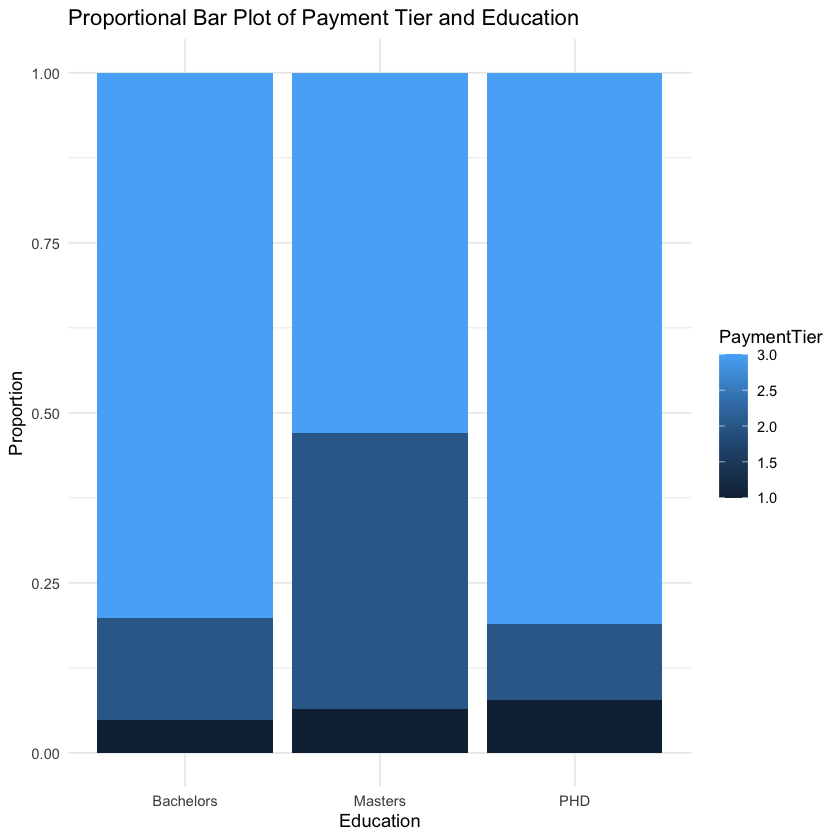

In [81]:
plot1

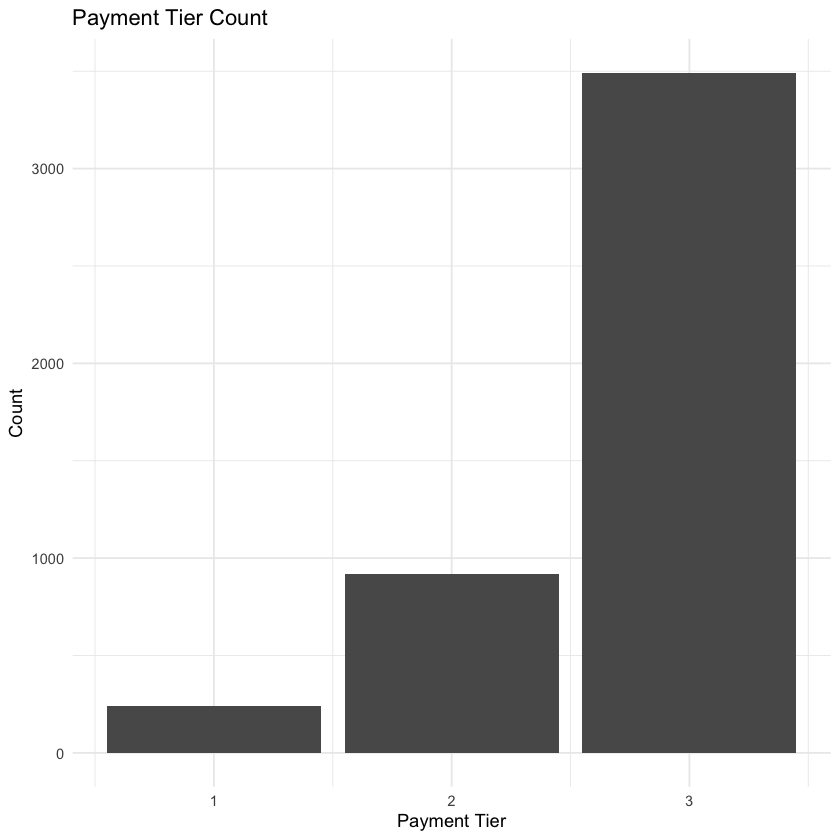

In [82]:
plot2

Looking at both barplots, it suggests that Payment Tier is in a decreasing order, with 3 being the common payment tier among all to 1 being the highest payment tier. We will use ordinal encoding for Payment Tier because it represent a ranked order, where each tier indicates a specific level of payment with 1 being the highest paid and 3 being the lowest. 


Overall our data does not have any missing values, nor is there inconsistency within our dataset. Hence, the cleaning and wrangling of the dataset will focus on removing variables that we are not interested in as well as conducting appropriate encoding techniques for our categorical variables.

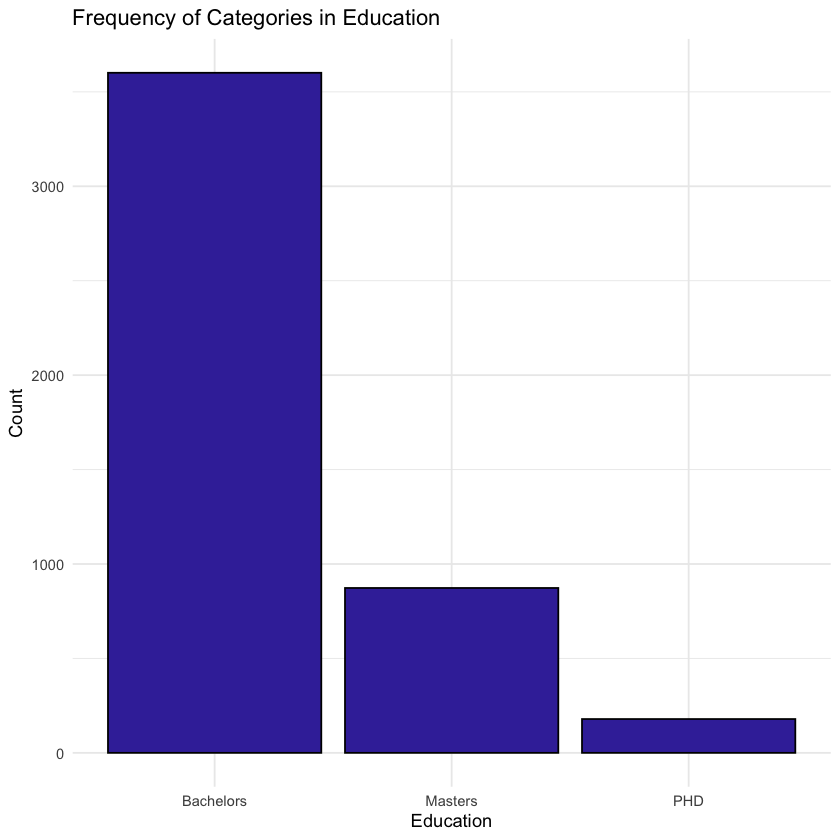

In [83]:
ggplot(employee_data, aes(x = Education)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in Education",
       x = "Education",
       y = "Count") +
  theme_minimal()

For Education, we will create a new column "Edu_level" that uses Ordinal Encoding on Education as it does represent an increasing order as we go from Bachelors, Masters to PHD.

In [8]:
employee_data <- employee_data |>
                mutate(Edu_level = fct_relevel(Education, "PHD", "Masters", "Bachelors"),
                       Edu_level = as.numeric(Edu_level))
head(employee_data)

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Edu_level
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0,3
Bachelors,2013,Pune,1,28,Female,No,3,1,3
Bachelors,2014,New Delhi,3,38,Female,No,2,0,3
Masters,2016,Bangalore,3,27,Male,No,5,1,2
Masters,2017,Pune,3,24,Male,Yes,2,1,2
Bachelors,2016,Bangalore,3,22,Male,No,0,0,3


### Data Visualisation

In [84]:
names(employee_data)

[1] "Education"                 "JoiningYear"              
[3] "City"                      "PaymentTier"              
[5] "Age"                       "Gender"                   
[7] "EverBenched"               "ExperienceInCurrentDomain"
[9] "LeaveOrNot"

In [100]:
employee_mutate <- employee_data %>%
    mutate(
        Education = as.numeric(factor(Education)),
        City = as.numeric(factor(City)),
        Gender = as.numeric(factor(Gender)),
        EverBenched = as.numeric(factor(EverBenched)),
        LeaveOrNot = as.numeric(LeaveOrNot)
    )

In [86]:
education_plot <- employee_data |>
                    ggplot(aes(x = Education)) +
                    geom_bar(fill = "lightblue") +
                    labs(title = "Distribution of Employee ",
                         x = "",
                         y = "Count") +
                    theme_minimal()

joiningYear_plot <- employee_data |>
                    ggplot(aes(x = JoiningYear)) +
                    geom_histogram(fill = "lightblue") +
                    labs(title = "Distribution of Employee ",
                         x = "",
                         y = "Count") +
                    theme_minimal()

city_plot <- employee_data |>
                    ggplot(aes(x = City)) +
                    geom_bar(fill = "lightblue") +
                    labs(title = "Distribution of Employee ",
                         x = "",
                         y = "Count") +
                    theme_minimal()

paymentTier_plot <- employee_data |>
                    ggplot(aes(x = City)) +
                    geom_bar(fill = "lightblue") +
                    labs(title = "Distribution of Employee ",
                         x = "",
                         y = "Count") +
                    theme_minimal()

age_plot <- employee_data |>
                    ggplot(aes(x = Age)) +
                    geom_histogram(fill = "lightblue") +
                    labs(title = "Distribution of Employee ",
                         x = "",
                         y = "Count") +
                    theme_minimal()

gender_plot <- employee_data |>
                    ggplot(aes(x = Gender)) +
                    geom_bar(fill = "lightblue") +
                    labs(title = "Distribution of Employee ",
                         x = "",
                         y = "Count") +
                    theme_minimal()

everBenched_plot <- employee_data |>
                    ggplot(aes(x = EverBenched)) +
                    geom_bar(fill = "lightblue") +
                    labs(title = "Distribution of Employee ",
                         x = "",
                         y = "Count") +
                    theme_minimal()

experienceInCurrentDomain_plot <- employee_data |>
                    ggplot(aes(x = ExperienceInCurrentDomain)) +
                    geom_histogram(fill = "lightblue") +
                    labs(title = "Distribution of Employee ",
                         x = "",
                         y = "Count") +
                    theme_minimal()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


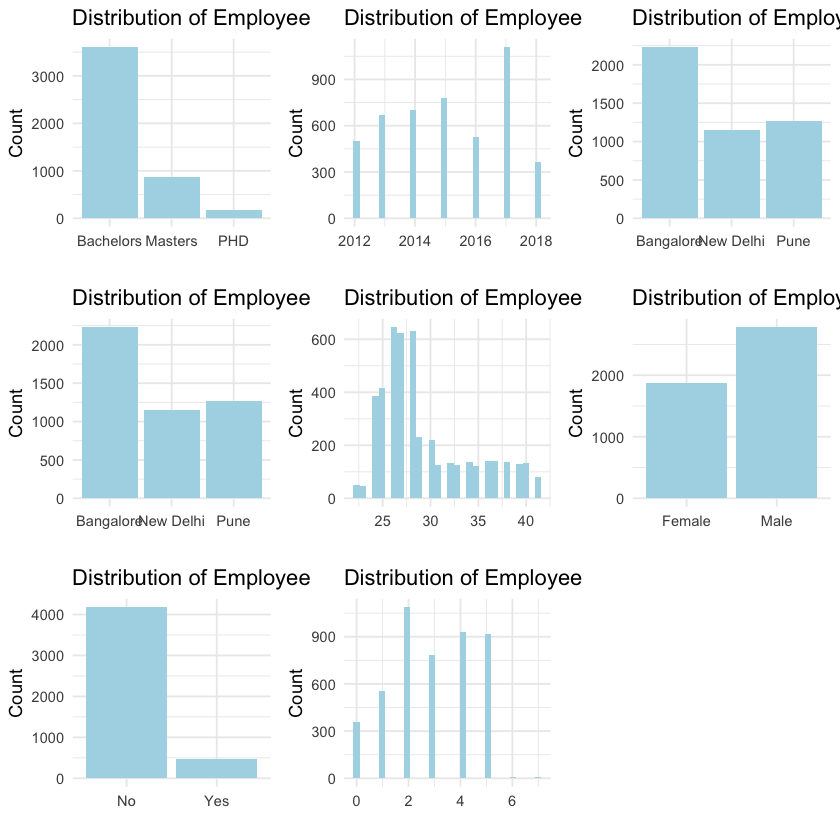

In [87]:
plot_grid(education_plot, joiningYear_plot, city_plot, paymentTier_plot, age_plot, gender_plot, everBenched_plot, experienceInCurrentDomain_plot, ncol = 3, nrow=3)

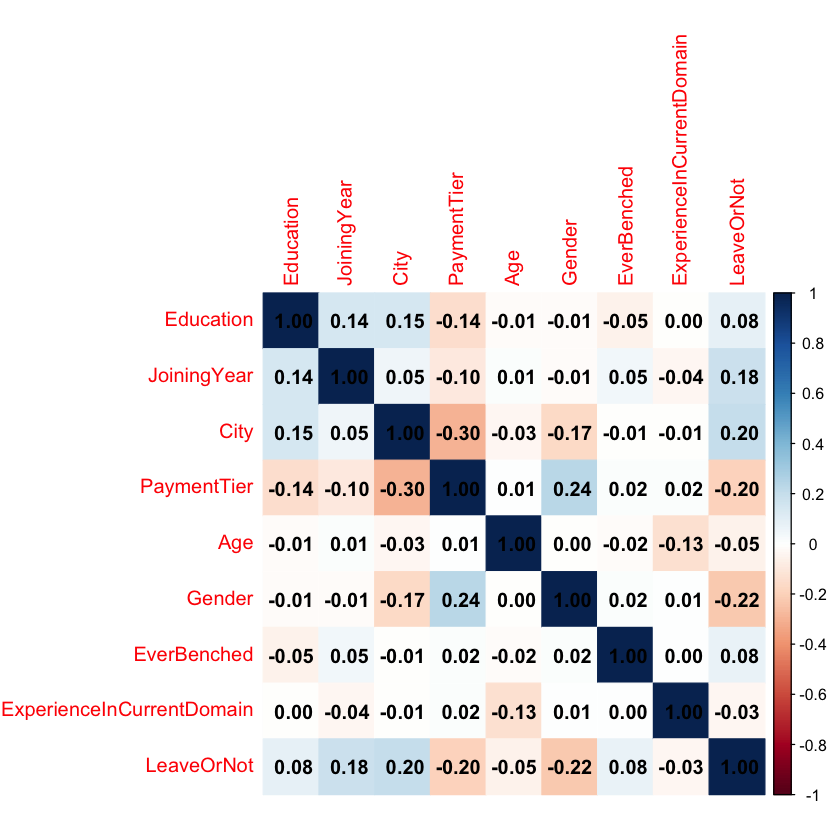

In [105]:
cor_matrix <- cor(employee_mutate, use = "complete.obs")

# Correlation matrix
corrplot(cor_matrix, method = "color", addCoef.col = "black")